In [1]:
from parsers import SHIFT_REDUCE_MODELS, CHART_MODELS, ALL_MODELS

In [2]:
from load_corpora import ENGLISH_CORPORA_NAMES

In [3]:
ALL_MODELS

[{'name': 'chart-seed=1', 'parser': 'chart', 'seed': 1, 'lex_rep': 'bert'},
 {'name': 'chart-seed=2', 'parser': 'chart', 'seed': 2, 'lex_rep': 'bert'},
 {'name': 'chart-seed=3', 'parser': 'chart', 'seed': 3, 'lex_rep': 'bert'},
 {'name': 'chart-seed=4', 'parser': 'chart', 'seed': 4, 'lex_rep': 'bert'},
 {'name': 'chart-seed=5', 'parser': 'chart', 'seed': 5, 'lex_rep': 'bert'},
 {'name': 'chartlstm-seed=1',
  'parser': 'chartlstm',
  'seed': 1,
  'lex_rep': 'lstm'},
 {'name': 'chartlstm-seed=2',
  'parser': 'chartlstm',
  'seed': 2,
  'lex_rep': 'lstm'},
 {'name': 'chartlstm-seed=3',
  'parser': 'chartlstm',
  'seed': 3,
  'lex_rep': 'lstm'},
 {'name': 'chartlstm-seed=4',
  'parser': 'chartlstm',
  'seed': 4,
  'lex_rep': 'lstm'},
 {'name': 'chartlstm-seed=5',
  'parser': 'chartlstm',
  'seed': 5,
  'lex_rep': 'lstm'},
 {'name': 'inorder-bert-seed=1-beam=10',
  'parser': 'inorder',
  'seed': 1,
  'beam_size': 10,
  'lex_rep': 'bert'},
 {'name': 'inorder-bert-seed=2-beam=10',
  'parser':

In [5]:
from decode_analysis import get_decode_stats, plot

In [6]:
decode_stats = get_decode_stats([model for model in ALL_MODELS if model['seed'] == 1 and model['parser'] in ['chart', 'inorder']], corpora_names=['genia_train'], include_length_analysis=False)


genia_train: chart-seed=1

genia_train: inorder-bert-seed=1-beam=10

genia_train: inorder-pos-seed=1-beam=10

genia_train: inorder-emb-pos-seed=1-beam=10


In [7]:
chart_model = decode_stats[0]
inorder_model = decode_stats[1]

In [8]:
chart_model

{'name': 'chart-seed=1',
 'parser': 'chart',
 'seed': 1,
 'lex_rep': 'bert',
 'recall': 84.9,
 'precision': 91.08,
 'fscore': 87.88,
 'complete_match': 18.89,
 'tagging_accuracy': 100.0,
 'error_count': 0,
 'skip_count': 0,
 'corpus_name': 'genia_train',
 'gold_file': '/home/dfried/projects/parse-analysis/src/../corpora/genia/train.gold.stripped',
 'pred_file': '../decodes/genia-train-chart-seed=1_pred-tag-replaced.test.txt'}

In [9]:
import evaluate

In [10]:
print(evaluate.evalb_from_files(
    chart_model['pred_file'], chart_model['gold_file']
)[0])

(Recall=84.90, Precision=91.08, FScore=87.88, CompleteMatch=18.89)


In [11]:
print(evaluate.evalb_from_files(
    inorder_model['pred_file'], inorder_model['gold_file']
)[0])

(Recall=84.80, Precision=91.53, FScore=88.04, CompleteMatch=19.22)


In [12]:
assert(inorder_model['gold_file'] == chart_model['gold_file'])

In [13]:
import trees

In [14]:
gold_trees = trees.load_trees(chart_model['gold_file'])

In [15]:
chart_trees = trees.load_trees(chart_model['pred_file'])

In [16]:
inorder_trees = trees.load_trees(inorder_model['pred_file'])

In [17]:
import span_length_breakdown

In [18]:
import matplotlib.pyplot as plt

In [19]:
pdb on

Automatic pdb calling has been turned ON


In [20]:
xs, fs, ms, rs, gc, ps, pc = span_length_breakdown.get_span_f1s_gte(gold_trees, inorder_trees)

In [21]:
ms[0]

251387

In [22]:
pc[0]

274642

In [23]:
rs[0]

0.8479683462750204

In [24]:
ps[0]

0.9153261336576343

In [25]:
fs[0]

0.8803607074067589

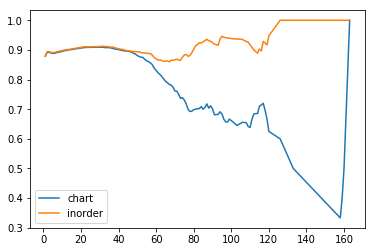

In [26]:
for name, pred_trees in [('chart', chart_trees), ('inorder', inorder_trees)]:
    xs, fs, mc, rs, gc, ps, pc = span_length_breakdown.get_span_f1s_gte(gold_trees, pred_trees)
    plt.plot(xs, fs, label=name)
plt.legend()
plt.show()